In [5]:
from typing import Annotated
from dotenv import load_dotenv
from typing_extensions import TypedDict
load_dotenv()
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.chat_models import init_chat_model

In [2]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

In [3]:
graph_builder = StateGraph(State)

In [6]:
llm = init_chat_model("google_genai:gemini-2.0-flash")

## Simple node

In [8]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

In [9]:
# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

Add an entry point to tell the graph where to start its work each time it is run

In [10]:
graph_builder.add_edge(START, "chatbot")

Add an exit point to indicate where the graph should finish execution

In [11]:
graph_builder.add_edge("chatbot", END)

Compile the graph

In [12]:
graph = graph_builder.compile()

### Visualize the graph

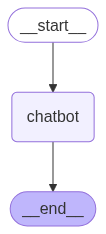

In [13]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [14]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

In [15]:
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: Good morning! How can I help you today?
Assistant: Predicting the specific events of Iran-Israel relations in June 2025 is impossible. However, we can discuss potential scenarios based on current trends and tensions.

**Key Factors Influencing the Relationship:**

*   **Nuclear Program:** Iran's nuclear program remains a major point of contention. Progress towards weaponization could escalate tensions dramatically. International negotiations (or lack thereof) will play a crucial role.
*   **Regional Proxy Conflicts:** Both countries are involved in proxy conflicts across the Middle East (Syria, Lebanon, Yemen, Iraq). Escalation in any of these areas could trigger direct confrontations.
*   **Political Leadership:** Changes in leadership in either country could shift policies and approaches to the conflict.
*   **International Relations:** The involvement of other major powers (US, Russia, China, Europe) significantly impacts the dynamic. Their stances on sanctions, diplomacy

c:\Users\FADEL\Documents\GitHub\langchain\project\langgraph-api\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:1568: UserWarning: HumanMessage with empty content was removed to prevent API error
  warnings.warn(


User: What do you know about LangGraph?


KeyboardInterrupt: 